# Required imports

In [1]:
import os
import io
import glob
import pickle
from IPython.display import Image, display
import base64
from io import BytesIO
import time
import binascii 
from PIL import Image as PILImage

# Install the necessary packages

In [2]:
!{sys.executable} -m pip install oscar-python
!pip install liboidcagent
!{sys.executable} -m pip install Pillow
from oscar_python.client import Client

/bin/bash: line 1: {sys.executable}: command not found


/bin/bash: line 1: {sys.executable}: command not found


# Load the OSCAR client

In [3]:
client_file_path = "client.pkl"
if not os.path.exists(client_file_path):
    raise FileNotFoundError(f"Client file not found at {client_file_path}")

with open(client_file_path, "rb") as client_file:
    oscar_client = pickle.load(client_file)
    print("OSCAR client loaded successfully.")

OSCAR client loaded successfully.


 # Read environment variables

In [4]:
SERVICE_NAME = os.getenv("SERVICE_NAME")
INPUT_DIR = os.getenv("INPUT_DIR")
OUTPUT_DIR = os.getenv("OUTPUT_DIR")

if not all([SERVICE_NAME, INPUT_DIR, OUTPUT_DIR]):
    raise ValueError("Please define SERVICE_NAME, INPUT_DIR, and OUTPUT_DIR environment variables.")

input_image_files = glob.glob(os.path.join(INPUT_DIR, "*.png"))

if not input_image_files:
    raise FileNotFoundError(f"No PNG files found in the input directory: {INPUT_DIR}")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# Invoking the service

Processing image: input/cat3.png


Service run successfully for input/cat3.png.
Processed image saved to: output/cat3_processed.png
Processing image: input/cat1.png


Service run successfully for input/cat1.png.
Processed image saved to: output/cat1_processed.png
Processing image: input/cat2.png


Service run successfully for input/cat2.png.


Processed image saved to: output/cat2_processed.png


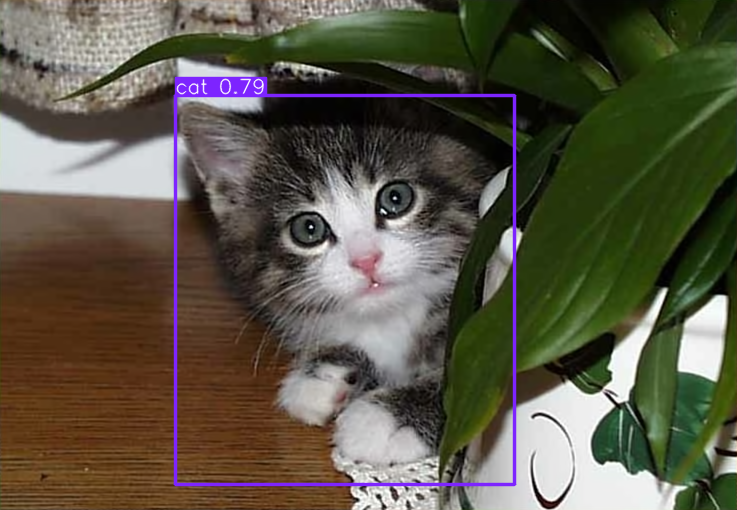

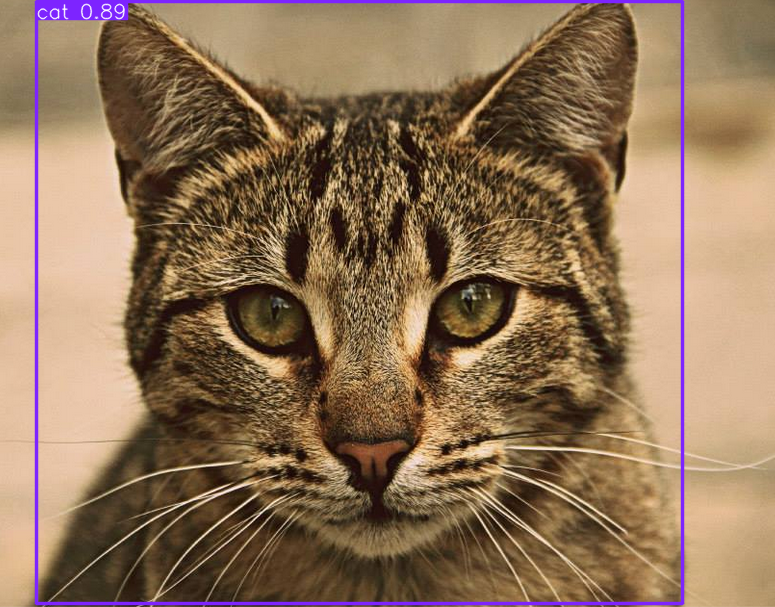

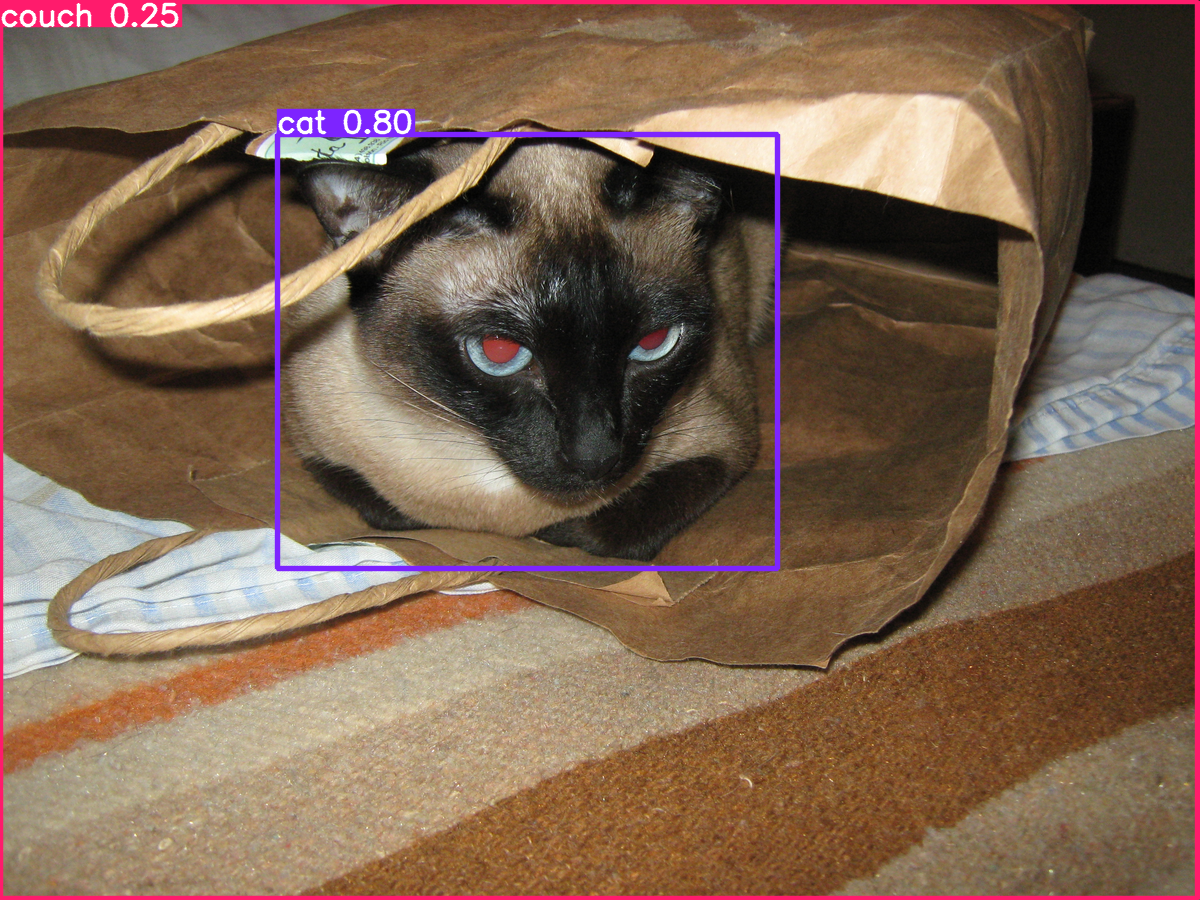

In [5]:
processed_images = []

for input_image_path in input_image_files:
    try:
        print(f"Processing image: {input_image_path}")

        # Construct output file paths
        base_name = os.path.splitext(os.path.basename(input_image_path))[0]
        output_png_path = os.path.join(OUTPUT_DIR, f"{base_name}_processed.png")

        # Call the service with the individual image path
        response = oscar_client.run_service(
            SERVICE_NAME,
            input=input_image_path,
            output=None  # No output file path needed
        )
        print(f"Service run successfully for {input_image_path}.")

        # Decode Base64 content
        try:
            base64_str = response.content.decode('utf-8')  # Ensure it's a proper string
            image_data = base64.b64decode(base64_str)
            image = PILImage.open(io.BytesIO(image_data))
        except Exception as decode_error:
            print(f"Error decoding Base64 image: {decode_error}")
            raise
        
        # Save the processed image
        image.save(output_png_path, format='PNG')
        print(f"Processed image saved to: {output_png_path}")
        processed_images.append(image)

    except Exception as e:
        print(f"Error processing {input_image_path}: {e}")

# Display all processed images
for img in processed_images:
    display(img)